In [ ]:
import pyrosm as psm
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely

In [1]:
# Initialize the OSM parser object with test data from Helsinki
osm = psm.OSM("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/OSM/raw/brandenburg-latest.osm.pbf")

NameError: name 'psm' is not defined

In [60]:
# filter the OSM data for highway links
highway_links = ["motorway_link", "trunk_link", "primary_link", "secondary_link", "tertiary_link"]
grid = osm.get_data_by_custom_criteria(custom_filter={"highway": highway_links},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)

In [ ]:
# project to correct CRS
grid = grid.to_crs(25833)

: 

In [63]:
grid.total_bounds

array([ 272151.12271898, 5693057.17831404,  481791.0581041 ,
       5930978.42891188])

In [18]:
# get the bounds for single highway type
bboxes = grid[grid.highway == "motorway_link"].bounds

<AxesSubplot: >

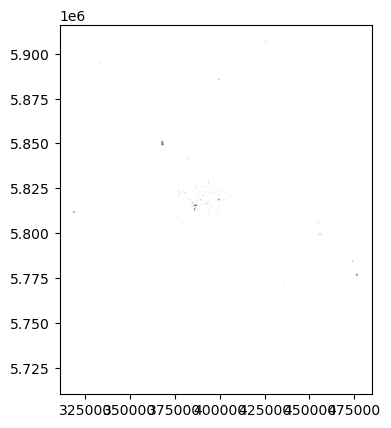

In [58]:
grid[grid.highway == "secondary_link"].plot()

In [20]:
# offset boxes by offset in meters
bboxes_offset = bboxes
offset = 1000

bboxes_offset["minx"] = bboxes_offset["minx"] - offset
bboxes_offset["miny"] = bboxes_offset["miny"] - offset
bboxes_offset["maxx"] = bboxes_offset["maxx"] + offset
bboxes_offset["maxy"] = bboxes_offset["maxy"] + offset

In [22]:
# turn the bboxes into polygons
polygons = bboxes_offset.apply(lambda bbox: shapely.geometry.Polygon([(bbox[0], bbox[1]),
                          (bbox[0], bbox[3]),
                          (bbox[2], bbox[3]),
                          (bbox[2], bbox[1])]),
                    axis = 1)

In [25]:
overlaps = np.zeros((polygons.shape[0], polygons.shape[0]))

In [26]:
# create matrix of intersecting bounding boxes
for i in range(polygons.shape[0]):
    for j in range(polygons.shape[0]):
        overlaps[i,j] = polygons.iloc[i].intersects(polygons.iloc[j]) 

In [27]:
# create a dictionary of transitive overlaps
outdict = [[]] * overlaps.shape[0]

In [28]:
# calculate the transitive overlaps
for i in range(overlaps.shape[0]):
    # 
    outdict[i] = np.where((np.sum(overlaps[np.where(overlaps[i, :]), :], axis = 1) > 0))[1]

In [29]:
test = grid[grid.highway == "motorway_link"]

In [39]:
test.loc[:,"group"] = [str(x) for x in outdict]

/scratch/slurm_tmpdir/job_21196769/ipykernel_525308/676676393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"group"] = [str(x) for x in outdict]


In [40]:
test_final = test.dissolve(by = "group")

In [41]:
borders = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/borders/gadm41_DEU_1.json")

In [42]:
test_final = test_final[test_final.within(borders.loc[borders["NAME_1"] == "Brandenburg", "geometry"].iloc[0])]

In [43]:
test_final.shape

(162, 30)

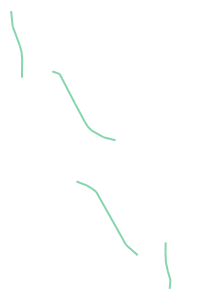

In [53]:
# we also include rest areas:
test_final["geometry"][3]

<AxesSubplot: >

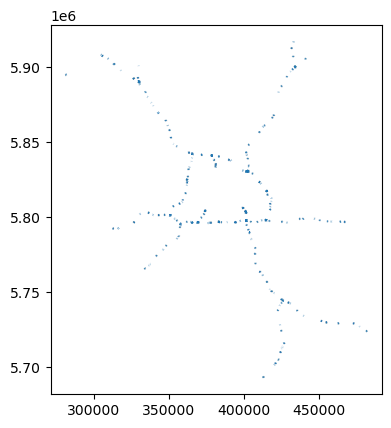

In [54]:
test_final.plot()

In [121]:
np.where(overlaps[0, :])

(array([   0,    1,    2,  575,  606,  607,  837,  838, 1286, 1329, 1535,
        1536, 1866, 1867]),)

array([   0,    1,    2,  324,  326,  327,  447,  448,  575,  606,  607,
        837,  838, 1286, 1329, 1490, 1491, 1493, 1494, 1495, 1535, 1536,
       1760, 1761, 1866, 1867])

In [116]:
outdict[0]

[0,
 1,
 2,
 575,
 606,
 607,
 837,
 838,
 1286,
 1329,
 1535,
 1536,
 1866,
 1867,
 0,
 1,
 2,
 447,
 448,
 575,
 606,
 607,
 837,
 838,
 1286,
 1329,
 1535,
 1536,
 1760,
 1761,
 1866,
 1867,
 0,
 1,
 2,
 447,
 575,
 606,
 607,
 837,
 838,
 1286,
 1329,
 1535,
 1536,
 1760,
 1761,
 1866,
 1867,
 3,
 7,
 145,
 468,
 469,
 490,
 491,
 603,
 647,
 780,
 4,
 7,
 145,
 146,
 302,
 466,
 467,
 468,
 469,
 470,
 471,
 673,
 674,
 780,
 1241,
 1471,
 1601,
 1741,
 1803,
 1804,
 1996,
 1997,
 5,
 6,
 499,
 500,
 5,
 6,
 499,
 500,
 3,
 4,
 7,
 145,
 146,
 468,
 469,
 471,
 490,
 491,
 603,
 647,
 673,
 674,
 780,
 1241,
 1601,
 1803,
 8,
 1081,
 1082,
 1083,
 1293,
 1394,
 1395,
 1396,
 9,
 345,
 346,
 464,
 546,
 547,
 548,
 699,
 1078,
 1593,
 1594,
 10,
 202,
 203,
 262,
 589,
 794,
 11,
 54,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 94,
 95,
 116,
 117,
 118,
 119,
 722,
 723,
 724,
 725,
 726,
 1005,
 1145,
 1146,
 1147,
 1162,
 1163,
 1164,
 1269,
 1270,
 1371,
 1372,
 1807,
 1

KeyboardInterrupt: 

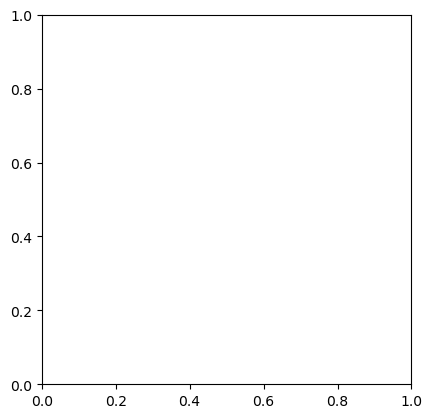

In [114]:
gpd.GeoSeries(polygons.iloc[outdict[0]]).plot() 

In [101]:
overlaps[0:10, 0:10]

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [104]:
np.unique(overlaps, axis = 1).shape

(2074, 577)

In [59]:
distances_x = bboxes["minx"].diff(1)
distances_y = bboxes["miny"].diff(1)

In [62]:
distances_x

0                NaN
1         460.283130
2        -571.834980
3       87514.127586
4       -3006.397474
            ...     
3283     -102.608575
3284    52299.851514
3293   -53732.696485
3294      343.010064
3299    29318.676185
Name: minx, Length: 2074, dtype: float64

In [60]:
j = 0
offset = 500
groups = [None] * len(distances_x)
for i in range(len(distances_x)):
    if((distances_x.iloc[i] >= offset) & (distances_y.iloc[i] >= offset)):
        j += 1
    groups[i] = j

In [61]:
pd.DataFrame({"groups": groups, "x": distances_x, "y": distances_y})

,groups,x,y
0,0,NaN,NaN
1,0,460.283130,-1340.459166
2,0,-571.834980,1013.847407
3,0,87514.127586,-92800.951975
4,0,-3006.397474,533.848845
...,...,...,...
3283,187,-102.608575,314.111102
3284,187,52299.851514,-58053.077328
3293,187,-53732.696485,61224.313318
3294,187,343.010064,13.223606
